In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Modules
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl

from scipy.stats import norm

In [3]:
# The path to our CSV file
#file = "..\Disney_Datasets\disney_movies_total_gross.csv"
moviedf = pd.read_csv(r"C:\Users\halcm\Desktop\KU-Project-1\Disney_Datasets\disney_movies_total_gross_2016.csv",encoding='cp1252')
revenuedf = pd.read_csv(r"C:\Users\halcm\Desktop\KU-Project-1\Disney_Datasets\disney_revenue_1991-2017.csv", encoding='cp1252')

# Read our Kickstarter data into pandas
moviedf.head()

#If data corrupts, consider writing to new csv file from jupyter

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,"Dec 21, 1937",Musical,G,"$184,925,485","$5,228,953,251"
1,Pinocchio,"Feb 9, 1940",Adventure,G,"$84,300,000","$2,188,229,052"
2,Fantasia,"Nov 13, 1940",Musical,G,"$83,320,000","$2,187,090,808"
3,Song of the South,"Nov 12, 1946",Adventure,G,"$65,000,000","$1,078,510,579"
4,Cinderella,"Feb 15, 1950",Drama,G,"$85,000,000","$920,608,730"


In [24]:
revenuedf = pd.read_csv(r"C:\Users\halcm\Desktop\KU-Project-1\Disney_Datasets\disney_revenue_1991-2017.csv", encoding='cp1252')
revenuedf.head()

,Year,Studio Entertainment[NI 1],Disney Consumer Products[NI 2],Disney Interactive[NI 3][Rev 1],Walt Disney Parks and Resorts,Disney Media Networks,Total
0,1991,2593.0,724.0,NaN,2794.0,NaN,6111
1,1992,3115.0,1081.0,NaN,3306.0,NaN,7502
2,1993,3673.4,1415.1,NaN,3440.7,NaN,8529
3,1994,4793.0,1798.2,NaN,3463.6,359,10414
4,1995,6001.5,2150.0,NaN,3959.8,414,12525


In [5]:
# Extract "Year", "Total"
reduced_rev_df = revenuedf.loc[:, ["Year", "Total"]]
reduced_rev_df.head()

,Year,Total
0,1991,6111
1,1992,7502
2,1993,8529
3,1994,10414
4,1995,12525


In [6]:
reduced_rev_df['Diff'] = reduced_rev_df['Total'] - reduced_rev_df['Total'].shift(1)
reduced_rev_df.head()

,Year,Total,Diff
0,1991,6111,NaN
1,1992,7502,1391.0
2,1993,8529,1027.0
3,1994,10414,1885.0
4,1995,12525,2111.0


In [7]:
reduced_rev_df.describe()

,Year,Total,Diff
count,27.000000,27.000000,26.000000
mean,2004.000000,30410.703704,1885.615385
std,7.937254,14449.065093,1651.391246
min,1991.000000,6111.000000,-1694.000000
25%,1997.500000,22724.500000,1068.250000
50%,2004.000000,30752.000000,1899.500000
75%,2010.500000,39478.000000,2813.250000
max,2017.000000,55632.000000,6214.000000


In [8]:
# Calculate the average total revenue for all years
reduced_rev_df["Total"].mean()

30410.703703703704

In [9]:
# Create an array that contains the revenue for the year before, year of, and year after the acquisition
revenue1 = [36149000.00, 38063000.00, 40893000.00]
x_axis = np.arange(len(revenue1))

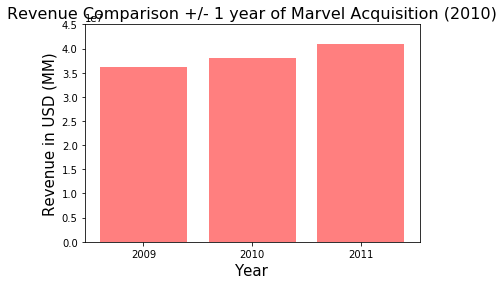

In [23]:
plt.bar(x_axis, revenue1, color='r', alpha=0.5, align="center")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["2009", "2010", "2011"])
plt.ylim([0.0, 45000000.00])

# Give our chart some labels and a tile
plt.title("Revenue Comparison +/- 1 year of Marvel Acquisition (2010)",fontsize=16)
plt.xlabel("Year",fontsize=15)
plt.ylabel("Revenue in USD (MM)",fontsize=15)

plt.savefig('Marvel.pdf')

In [12]:
# Create an array that contains the revenue for the year before, year of, and year after the acquisition
revenue2 = [42278000.00, 45041000.00, 48813000.00]
x_axis = np.arange(len(revenue2))

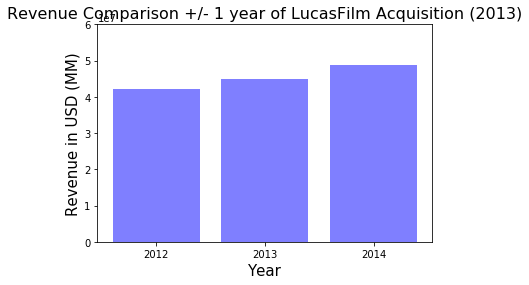

In [13]:
plt.bar(x_axis, revenue2, color='b', alpha=0.5, align="center")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["2012", "2013", "2014"])
plt.ylim([0.0, 60000000.00])

# Give our chart some labels and a tile
plt.title("Revenue Comparison +/- 1 year of LucasFilm Acquisition (2013)",fontsize=16)
plt.xlabel("Year",fontsize=15)
plt.ylabel("Revenue in USD (MM)", fontsize=15)

plt.savefig('LucasFilm.pdf')

In [14]:
stdev = reduced_rev_df["Diff"].std()
stdev

1651.391245633162

In [15]:
mean = np.mean(reduced_rev_df["Diff"])
mean

1885.6153846153845

In [16]:
reduced_rev_df["Z Score"] = (reduced_rev_df["Diff"] - mean) / stdev

In [17]:
z_scores = [(y - mean) / stdev for y in reduced_rev_df["Diff"]]

In [18]:
reduced_rev_df.head()

,Year,Total,Diff,Z Score
0,1991,6111,NaN,NaN
1,1992,7502,1391.0,-0.299514
2,1993,8529,1027.0,-0.519935
3,1994,10414,1885.0,-0.000373
4,1995,12525,2111.0,0.136482


In [19]:
np.where(np.abs(reduced_rev_df["Z Score"])> 1)

(array([ 5,  6, 11, 13, 18, 23, 24, 26], dtype=int64),)

In [20]:
#Z Score indicates how far away a data point is from the mean.  
#The higher the score, the farther away the data point is from the average.
#A score of 1 indicates the data point is one standard deviation away from the mean.

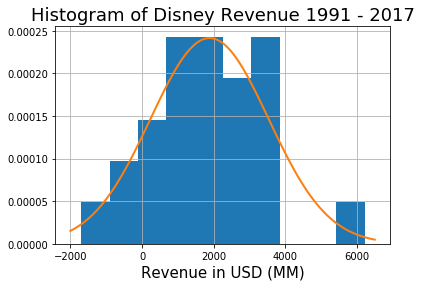

In [22]:
reduced_rev_df.hist(column='Diff', normed=True)

x = np.linspace(-2000,6500,100)
y = norm.pdf(x, loc=mean, scale=stdev)   
pl.plot(x,y, linewidth=2.0)

plt.title("Histogram of Disney Revenue 1991 - 2017", fontsize=18)
plt.xlabel("Revenue in USD (MM)",fontsize=15)
#plt.ylabel("Frequency",fontsize=15)

plt.savefig('Histogram.pdf')

In [ ]:
reduced_rev_df[np.abs(reduced_rev_df["Z Score"])>1]